# Natural Language Processing

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Importing dataset

In [2]:
dataset = pd.read_csv('Augmented_Reviews.tsv', delimiter = '\t', quoting = 3)

## Cleaning the dataset

In [3]:
import re
import nltk
nltk.download('stopwords')
# stopwords -> words that doesn't change the context of the sentence
# example : he, she, it, as, was, etc.,
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 10000): #because of the presence of 1000 reviews in the dataset
  #[^a-zA-Z] is the regular expression pattern. It matches any character that is not an English letter (both uppercase and lowercase).
  #The second argument, ' ', is a space. This means that any character that matches the pattern (i.e., any non-letter character) will be replaced by a space.
  ratings = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  ratings = ratings.lower()
  ratings = ratings.split()

  #The PorterStemmer is used for stemming words, which means reducing words to their root or base form.
  #This is useful in text preprocessing for natural language processing tasks. For example, the words "running", "runner", and "ran" would all be reduced to the root form "run".
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english') #chosen language -> english
  all_stopwords.remove('not') #removing 'not' word from stop words beacuse it can determine the sentiment of the review (tasty->positive, not tasty->negative)

  #The entire line is a list comprehension that creates a new list.
  #It iterates over each word in the zomato_ratings list. The condition "if not word in set(all_stopwords)" ensures that only words that are not stopwords are processed further.
  #For each word that is not a stopword, it applies the ps.stem() method, which stems the word using the Porter Stemmer.
  ratings = [ps.stem(word) for word in ratings if not word in set(all_stopwords)]
  ratings = ' '.join(ratings)
  corpus.append(ratings)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
print(corpus)
len(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'name', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not happier', 'seem li

10000

## Bag of words creation

In [5]:
#CountVectorizer is used to convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#(max_features = 1500): This specifies that the vectorizer should consider only the top 1500 most frequent words in the corpus.
cv = CountVectorizer(max_features = 3000)

#.fit: Learns the vocabulary dictionary of all tokens in the corpus.
#.transform: Transforms the corpus into a document-term matrix.
#.toarray(): Converts the sparse matrix to a dense numpy array. The resulting X is a matrix where each row represents a document and each column represents a word from the vocabulary.
#.toarray(): Converts the sparse matrix to a dense numpy array. The resulting X is a matrix where each row represents a document and each column represents a word from the vocabulary.
X = cv.fit_transform(corpus).toarray()

#dataset.iloc[:, -1]: Uses .iloc to select all rows (:) and the last column (-1) of the dataset. This is based on the assumption that the target variable is in the last column.
#.values: Converts the selected column to a numpy array.
#y: This variable now contains the target labels corresponding to each document in the corpus.
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
print(y)

[1 0 0 ... 0 0 0]


## Splitting data into test and training sets

In [8]:
print(X.shape)
print(y.shape)


(10000, 2860)
(10000,)


In [9]:
print("Number of reviews:", len(corpus))
print("Number of target labels:", len(y))

Number of reviews: 10000
Number of target labels: 10000


In [10]:
#The provided code splits the dataset into training and testing sets for the purposes of model training and evaluation.
#X: The feature matrix containing the input data.
#y: The target vector containing the labels.
#test_size = 0.20: Specifies that 20% of the data should be allocated to the test set, and the remaining 80% should be allocated to the training set.
#random_state = 21: Sets the seed for the random number generator to ensure reproducibility. Using the same random_state value ensures that the same split is obtained every time the code is run.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

## Training and Prediction using multiple ML Models

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# ----------- 1. Naive Bayes Classifier (Gaussian) -----------
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy =>", round(acc_nb * 100, 2), "%")
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))

# ----------- 2. Logistic Regression -----------
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy =>", round(acc_lr * 100, 2), "%")
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))

# ----------- 3. Random Forest Classifier -----------
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy =>", round(acc_rf * 100, 2), "%")
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

# ----------- Saving the Best Model (e.g., Logistic Regression here) -----------
with open('Review_model.pkl', 'wb') as file:
    pickle.dump(lr_classifier, file)

# ----------- Saving the CountVectorizer -----------
with open('CountVectorizer.pkl', 'wb') as cv_file:
    pickle.dump(cv, cv_file)


Naive Bayes Accuracy => 88.65 %
Confusion Matrix (Naive Bayes):
 [[ 753  221]
 [   6 1020]]
Logistic Regression Accuracy => 96.7 %
Confusion Matrix (Logistic Regression):
 [[946  28]
 [ 38 988]]
Random Forest Accuracy => 98.25 %
Confusion Matrix (Random Forest):
 [[ 959   15]
 [  20 1006]]


## Visualization

C:\Users\harsh\AppData\Local\Temp\ipykernel_28476\2110303613.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


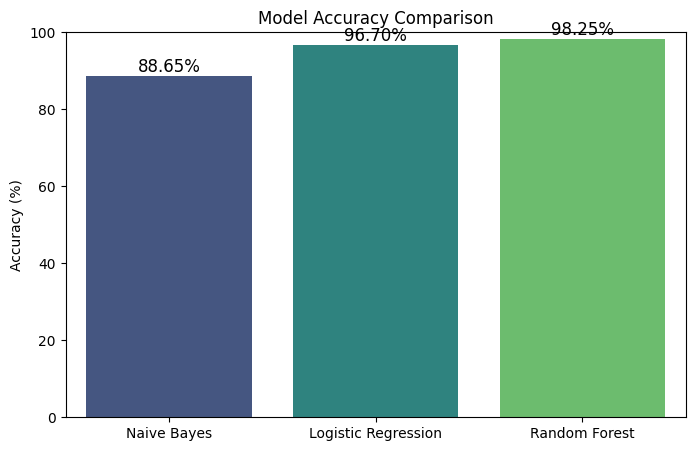

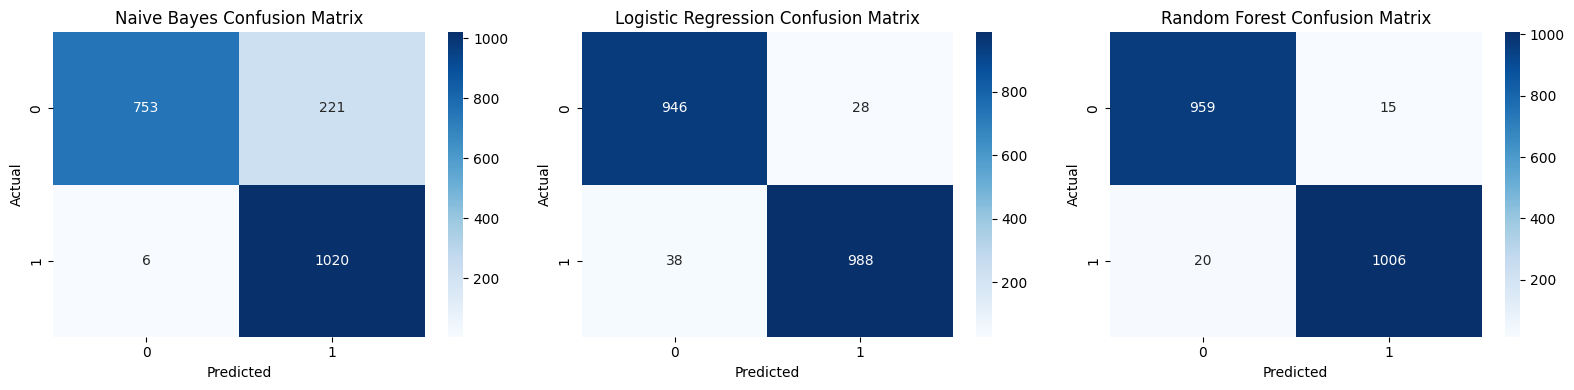

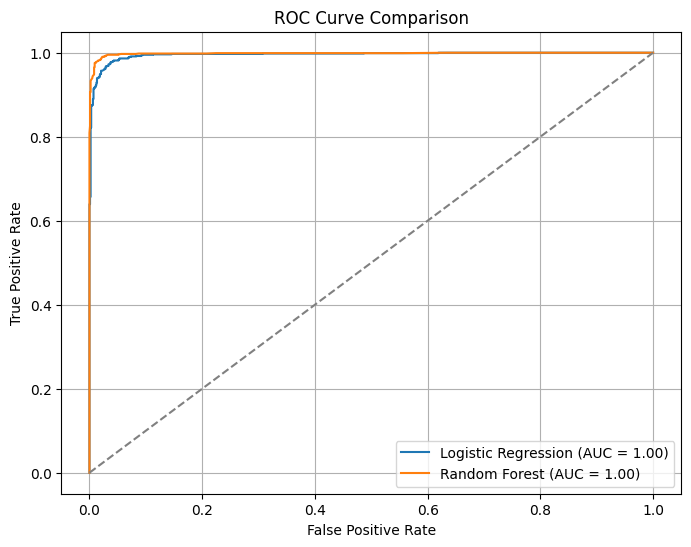

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ----------- 1. Accuracy Comparison (Bar Plot) -----------

# Accuracy Scores
model_names = ['Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracies = [acc_nb * 100, acc_lr * 100, acc_rf * 100]

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', fontsize=12)
plt.show()

# ----------- 2. Confusion Matrix Heatmaps -----------

# Confusion matrices
conf_matrices = [
    ('Naive Bayes', confusion_matrix(y_test, y_pred_nb)),
    ('Logistic Regression', confusion_matrix(y_test, y_pred_lr)),
    ('Random Forest', confusion_matrix(y_test, y_pred_rf))
]

# Plot Confusion Matrices
plt.figure(figsize=(16, 4))
for i, (name, cm) in enumerate(conf_matrices):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ----------- 3. ROC Curves (Optional - for Binary Classification) -----------

# Predict probabilities
y_score_lr = lr_classifier.predict_proba(X_test)[:, 1]
y_score_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

# Compute AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()